# Análise dos Pares
Após identificar os pares em Cointegration.ipynb, é hora de analisar quais os melhores estão sinalizando entrada

https://wtrust.com.br/Quanttools/

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import statsmodels.api as sm
import statistics
import matplotlib.pyplot as plt
import importlib
import Cointegration as coint

importlib.reload(coint)

<module 'Cointegration' from 'D:\\trades\\pairs_trading_b3\\Cointegration.py'>

# Funtions

In [2]:
def plot_last_days(data, y_symbol, x_symbol):
    index = len(data)-8
    fig2, axes = plt.subplots(nrows=4, ncols=2, figsize=(15, 13))
    for i, ax in enumerate(axes.flatten()):
        index+=1
        last_data = data.iloc[:index].copy()
        label = last_data.index[-1]
        subshow(last_data, y_symbol, x_symbol, ax, title=label)

def plot_show(data, pairs):
    fig2, axes = plt.subplots(nrows=int((pairs.shape[0]/2)), ncols=2, figsize=(15, 30))
    for i, ax in enumerate(axes.flatten()):
        row = pairs.iloc[i]
        y_symbol = row['Dependente']
        x_symbol = row['Independente']

        subshow(data, y_symbol, x_symbol, ax, title='{}/{} ({})'.format(y_symbol, x_symbol, i))
    
def subshow(data, y_symbol, x_symbol, ax, period=250, title=''):
    y, x = coint.getvalues_by_period(data[y_symbol], data[x_symbol], period)
    model= coint.model_ols(y, x)
    result = coint.zscore(model.resid)
    std = result.std()
    result.plot(ax=ax)
    #ax.plot(result)
    if(title == ''):
        ax.set_title('{} / {}'.format(y_symbol, x_symbol))
    else:
        ax.set_title(title)
    ax.margins(0.1)
    ax.set_xlabel('')

    ax.axhline(0, color='black',label='mean')
    ax.axhline(2*std, color='red', linestyle='--', linewidth=2)
    ax.axhline(-2*std, color='green', linestyle='--', linewidth=2)

In [3]:
path_data_cart = 'datasets/data_cart.csv'
path_data_yahoo = 'datasets/data_yahoo.csv'
path_data = 'datasets/data.csv'

In [4]:
data = pd.read_csv(path_data_yahoo, index_col=0)
pairs = pd.read_csv('datasets/cointegrated_pairs.csv')

print('{} to {}'.format(data.index[0], data.index[-1]))
print('data: {}'.format(data.shape))
print('pairs: {}'.format(pairs.shape))

2019-05-02 to 2020-08-24
data: (328, 72)
pairs: (1677, 14)


Procura pares que estão quase no ponto de entrada 95% de distância da média e 5% próximo da zona -2 e +2

In [5]:
pairs_signal = pairs.loc[(pairs['Std'] >= 2) & (pairs['Std'] <= 2.2)].copy()
pairs_signal.reset_index(drop=True, inplace=True)
pairs_signal.shape

(39, 14)

In [6]:
pairs_signal = pairs_signal.loc[(pairs_signal['PeriodQt'] >= 6)].sort_values(by=['HalfLife'], ascending=True).copy()
pairs_signal.reset_index(drop=True, inplace=True)
pairs_signal

,Period,Dependente,Independente,Dickey-Fuller,ADF,Beta,Std,HalfLife,Hurst,Corr,Signal,SignalStr,PeriodQt,PeriodStr
0,250,HYPE3,QUAL3,-3.882343,99,0.337415,2.157267,6,0.310823,0.548259,1.076474,Short/Long,9,"100,120,140,160,180,200,220,240,250"
1,250,MULT3,VIVT4,-4.803501,99,1.128607,2.136967,6,0.203115,0.512101,1.066344,Long/Short,9,"100,120,140,160,180,200,220,240,250"
2,250,ENBR3,MULT3,-3.370346,95,0.383070,2.192400,7,0.257455,0.628357,1.094006,Short/Long,8,"100,140,160,180,200,220,240,250"
3,250,IGTA3,VIVT4,-4.120089,99,1.890773,2.034836,8,0.239732,0.531026,1.015381,Long/Short,9,"100,120,140,160,180,200,220,240,250"
4,250,RENT3,TAEE11,-3.162924,95,4.064307,2.181888,8,0.291275,0.579264,1.088760,Short/Long,6,"120,180,200,220,240,250"
5,250,IRBR3,VIVT4,-2.988126,95,2.857443,2.045406,9,0.122335,0.253718,1.020655,Long/Short,9,"100,120,140,160,180,200,220,240,250"
6,240,GGBR4,UGPA3,-2.918354,95,0.817355,2.064692,11,0.246292,0.722075,1.025683,Short/Long,6,"120,140,160,180,200,240"
7,220,RADL3,TAEE11,-2.930409,95,2.941827,2.073221,12,0.279251,0.313875,0.922997,Short/Long,6,"120,140,160,180,200,220"


In [7]:
#pairs_signal.to_csv('datasets/sinais/sinais_29062020.csv', index=False)

### Plota todos os sinais

C:\ProgramData\Anaconda3\lib\site-packages\numpy\core\fromnumeric.py:2389: FutureWarning: Method .ptp is deprecated and will be removed in a future version. Use numpy.ptp instead.
  return ptp(axis=axis, out=out, **kwargs)


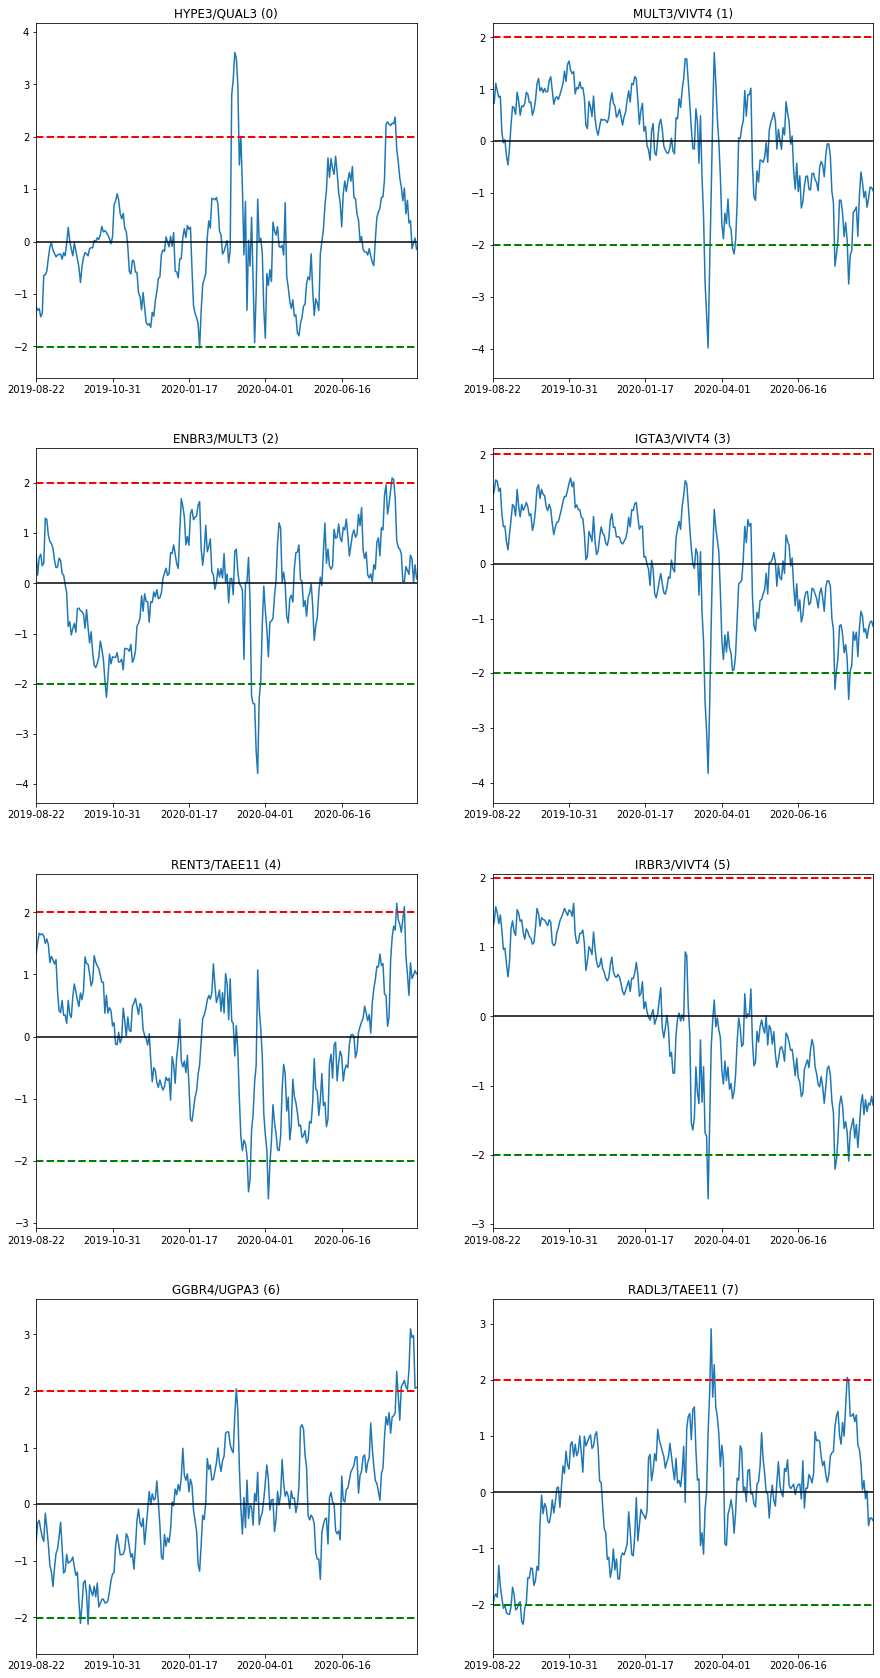

In [8]:
fig2, axes = plt.subplots(nrows=int((pairs_signal.shape[0]/2)), ncols=2, figsize=(15, 30))
for i, ax in enumerate(axes.flatten()):
    row = pairs_signal.iloc[i]
    y_symbol = row['Dependente']
    x_symbol = row['Independente']
    
    subshow(data, y_symbol, x_symbol, ax, title='{}/{} ({})'.format(y_symbol, x_symbol, i))
    #plt.tight_layout()

In [9]:
#pairs_signal.iloc[[0,1,2,6,9,11]].to_csv('datasets/oper/29062020.csv', index=False)

# Análise das operações abertas

In [10]:
operation = pd.read_csv('datasets/oper/29062020.csv')
operation

FileNotFoundError: [Errno 2] File b'datasets/oper/29062020.csv' does not exist: b'datasets/oper/29062020.csv'

In [ ]:
#operation[['Dependente', 'Independente', 'SignalStr']]

In [ ]:
"""excel = data[293:][['AZUL4', 'BBSE3']].copy()
excel = excel.iloc[::-1]
excel[0:10].to_excel('datasets/test.xlsx')"""

In [ ]:
for i, row in operation.iterrows():
    y, x = getvalues_by_period(data[row['Dependente']], data[row['Independente']], row['Period'])
    row = operation.iloc[i]
    y_symbol = row['Dependente']
    x_symbol = row['Independente']
    coint.show(data, y_symbol, x_symbol)

In [ ]:
coint.show(data, 'CYRE3', 'LREN3', 250)

In [ ]:
coint.show(data, 'CMIG4', 'ENGI11')
coint.show(data, 'BRKM5', 'LAME4')
coint.show(data, 'ELET3', 'PCAR3')